In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muralib123","key":"9a883ef6a4ba979681a51c61d6dcb1f5"}'}

In [4]:
mkdir ~/.kaggle

In [5]:
cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d serenaraju/yawn-eye-dataset-new

 95% 153M/161M [00:00<00:00, 244MB/s]
100% 161M/161M [00:00<00:00, 217MB/s]


In [8]:
!unzip yawn-eye-dataset-new.zip

Archive:  yawn-eye-dataset-new.zip
  inflating: dataset_new/test/Closed/_107.jpg  
  inflating: dataset_new/test/Closed/_115.jpg  
  inflating: dataset_new/test/Closed/_116.jpg  
  inflating: dataset_new/test/Closed/_120.jpg  
  inflating: dataset_new/test/Closed/_129.jpg  
  inflating: dataset_new/test/Closed/_130.jpg  
  inflating: dataset_new/test/Closed/_132.jpg  
  inflating: dataset_new/test/Closed/_137.jpg  
  inflating: dataset_new/test/Closed/_14.jpg  
  inflating: dataset_new/test/Closed/_148.jpg  
  inflating: dataset_new/test/Closed/_152.jpg  
  inflating: dataset_new/test/Closed/_159.jpg  
  inflating: dataset_new/test/Closed/_161.jpg  
  inflating: dataset_new/test/Closed/_163.jpg  
  inflating: dataset_new/test/Closed/_164.jpg  
  inflating: dataset_new/test/Closed/_167.jpg  
  inflating: dataset_new/test/Closed/_168.jpg  
  inflating: dataset_new/test/Closed/_169.jpg  
  inflating: dataset_new/test/Closed/_172.jpg  
  inflating: dataset_new/test/Closed/_181.jpg  
  infl

In [9]:
from PIL import Image
import os
size_600 = (600,600)

input_folder1 = '/content/dataset_new/train/Closed/'
input_folder2 = '/content/dataset_new/train/Open/'
input_folder3 = '/content/dataset_new/train/no_yawn/'
input_folder4 = '/content/dataset_new/train/yawn/'
input_folder5 = '/content/dataset_new/test/Closed/'
input_folder6 = '/content/dataset_new/test/Open/'
input_folder7 = '/content/dataset_new/test/no_yawn/'
input_folder8 = '/content/dataset_new/test/yawn/'

output_folder1 = 'dataset_600/train/Closed/'
output_folder2 = 'dataset_600/train/Open/'
output_folder3 = 'dataset_600/train/no_yawn/'
output_folder4 = 'dataset_600/train/yawn/'
output_folder5 = 'dataset_600/test/Closed/'
output_folder6 = 'dataset_600/test/Open/'
output_folder7 = 'dataset_600/test/no_yawn/'
output_folder8 = 'dataset_600/test/yawn/'
def resize_func(input_folder,output_folder,size_input):
  for file_object in os.listdir(input_folder):
    if file_object.endswith('.jpg'):
      file_path = os.path.join(input_folder,file_object)
      img = Image.open(file_path)
      fn,fext = os.path.splitext(file_object)
      img = img.convert("RGB")
      img.thumbnail(size_input)
      output_path = os.path.join(output_folder,'{}_resized{}'.format(fn,fext))
      img.save(output_path)

resize_func(input_folder1,output_folder1,size_600)
resize_func(input_folder2,output_folder2,size_600)
resize_func(input_folder3,output_folder3,size_600)
resize_func(input_folder4,output_folder4,size_600)
resize_func(input_folder5,output_folder5,size_600)
resize_func(input_folder6,output_folder6,size_600)
resize_func(input_folder7,output_folder7,size_600)
resize_func(input_folder8,output_folder8,size_600)

In [10]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import os
import numpy as np
datagen = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0,
    height_shift_range=0,
    shear_range=0,
    zoom_range=0,
    horizontal_flip=True,
    fill_mode='reflect'
)
input_folder1 = '/content/dataset_600/train/no_yawn/'
input_folder2 = '/content/dataset_600/train/yawn/'
input_folder3 = '/content/dataset_600/test/no_yawn/'
input_folder4 = '/content/dataset_600/test/yawn/'
def data_augmen(source_directory,destination_directory):
  file_list = os.listdir(source_directory)
  for file_name in file_list:
    img = Image.open(os.path.join(source_directory,file_name))
    img_array = np.array(img)
    img_array = img_array.reshape((1,) + img_array.shape)
    i = 0
    for batch in datagen.flow(img_array, batch_size=1, save_to_dir=destination_directory,
                              save_prefix='aug_' + file_name, save_format='png'):
        i += 1
        if i >= 2:
            break
data_augmen(input_folder1,input_folder1)
data_augmen(input_folder2,input_folder2)
data_augmen(input_folder3,input_folder3)
data_augmen(input_folder4,input_folder4)

In [11]:
! wget 'https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_eye.xml'

--2023-11-12 08:26:17--  https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
Resolving github.com (github.com)... 20.29.134.23
Connecting to github.com (github.com)|20.29.134.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1043534 (1019K) [text/plain]
Saving to: ‘haarcascade_eye.xml’

haarcascade_eye.xml 100%[===================>]   1019K  --.-KB/s    in 0.06s   

2023-11-12 08:26:18 (15.4 MB/s) - ‘haarcascade_eye.xml’ saved [1043534/1043534]



In [12]:
import os
import cv2
def face_for_yawn(direc="/content/dataset_new/train", face_cas_path="../input/prediction-images/haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no

def get_data(dir_path="/content/dataset_new/train", face_cas="/content/haarcascade_frontalface_default.xml", eye_cas="/content/haarcascade_eye.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)
new_data = append_data()
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)
y = np.array(y)
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

0
1
2
3


<ipython-input-12-a1139829d119>:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(yaw_no)


In [13]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [15]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 71, 71, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 34, 34, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0

In [16]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/50
36/36 [==============================] - 24s 293ms/step - loss: 1.2993 - accuracy: 0.3991 - val_loss: 1.1679 - val_accuracy: 0.4049
Epoch 2/50
36/36 [==============================] - 7s 191ms/step - loss: 0.7532 - accuracy: 0.6765 - val_loss: 0.5004 - val_accuracy: 0.7652
Epoch 3/50
36/36 [==============================] - 8s 208ms/step - loss: 0.4524 - accuracy: 0.8000 - val_loss: 0.4133 - val_accuracy: 0.8036
Epoch 4/50
36/36 [==============================] - 8s 211ms/step - loss: 0.4036 - accuracy: 0.8278 - val_loss: 0.2588 - val_accuracy: 0.9130
Epoch 5/50
36/36 [==============================] - 7s 183ms/step - loss: 0.3324 - accuracy: 0.8600 - val_loss: 0.2409 - val_accuracy: 0.8907
Epoch 6/50
36/36 [==============================] - 7s 183ms/step - loss: 0.3246 - accuracy: 0.8617 - val_loss: 0.2222 - val_accuracy: 0.9069
Epoch 7/50
36/36 [==============================] - 8s 220ms/step - loss: 0.3030 - accuracy: 0.8730 - val_loss: 0.2826 - val_accuracy: 0.8887
Epoch

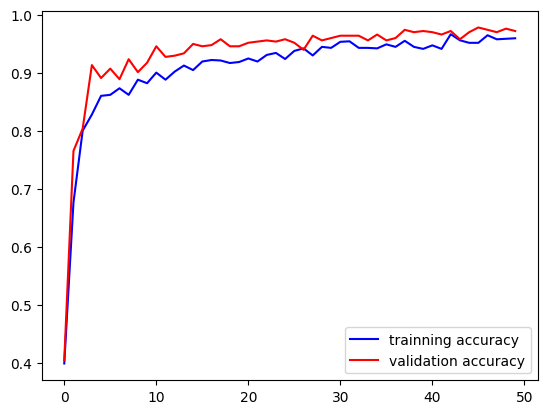

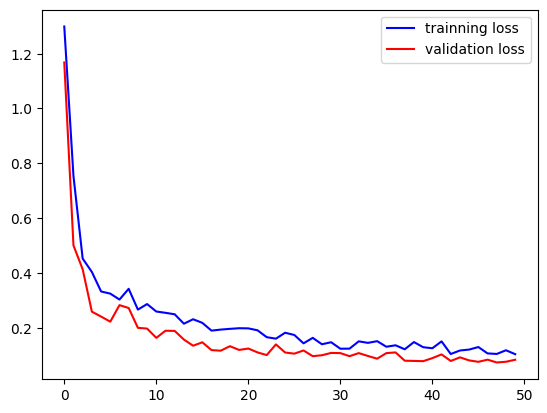

In [17]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [18]:
model.save("drowiness_new6.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
model.save("drowiness_new6.model")

In [20]:
prediction = model.predict(X_test)

16/16 [==============================] - 0s 24ms/step


In [21]:
import numpy as np

# Assuming prediction is a 1D array of class indices
prediction = model.predict(X_test)
prediction = np.argmax(prediction, axis=1)  # Get the class indices

# One-hot encode the predictions
n_values = np.max(prediction) + 1
pred = np.eye(n_values)[prediction.astype(int)]

print(pred)


16/16 [==============================] - 0s 23ms/step
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score

#Generate the confusion matrix
cf_matrix=confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))
print(cf_matrix)
print(accuracy_score(y_test.argmax(axis=1), pred.argmax(axis=1)))

[[ 39  13   1   0]
 [  2  63   1   0]
 [  0   1 175   5]
 [  0   0   4 190]]
0.9453441295546559


In [23]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), prediction, target_names=labels_new))

              precision    recall  f1-score   support

        yawn       0.95      0.74      0.83        53
     no_yawn       0.82      0.95      0.88        66
      Closed       0.97      0.97      0.97       181
        Open       0.97      0.98      0.98       194

    accuracy                           0.95       494
   macro avg       0.93      0.91      0.91       494
weighted avg       0.95      0.95      0.94       494



In [24]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath, face_cas="../input/prediction-images/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("./drowiness_new6.h5")



0.   yawn
1.   no_yawn
2.   closed
3.   open




In [25]:
prediction = model.predict([prepare("/content/dataset_new/train/Closed/_50.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 279ms/step


2

In [26]:
prediction = model.predict([prepare("/content/dataset_new/train/Open/_144.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 18ms/step


3

In [27]:
prediction = model.predict([prepare("/content/dataset_new/train/no_yawn/1266.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 20ms/step


3

In [28]:
prediction = model.predict([prepare("/content/dataset_new/train/no_yawn/1689.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 17ms/step


2

In [29]:
path="/content/dataset_new/train/yawn/290.jpg"
prediction = model.predict([prepare(path)])
np.argmax(prediction)

1/1 [==============================] - 0s 20ms/step


1

In [30]:
path1="/content/dataset_new/train/yawn/390.jpg"
prediction = model.predict([prepare(path)])
np.argmax(prediction)

1/1 [==============================] - 0s 22ms/step


1

In [31]:
path="/content/dataset_new/train/Open/_390.jpg"
prediction = model.predict([prepare(path)])
np.argmax(prediction)

1/1 [==============================] - 0s 18ms/step


3

In [32]:
path="/content/dataset_new/train/Open/_623.jpg"
prediction = model.predict([prepare(path)])
np.argmax(prediction)


1/1 [==============================] - 0s 19ms/step


3